## Summary of the 1.2 project on CN_dataset
### 1. a fundamental analysis of whats the composition of the article
### 2. using jieba to divide the content into words
### 3. draw the necessary information from the dataset
### 4. using the SKlrean to build multi-label classfication models and using three different algorithms to analyze which has the best accuracy 


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#import spacy
#nlp = spacy.load('en_core_web_sm')
import jieba
import jieba.analyse as analyse
jieba.enable_parallel()

In [2]:
df_cn = pd.read_csv('ChinaDaily_CN_cleaned.csv')

In [3]:
df_cn.head()

,Unnamed: 0,column_1,column_2,content,publishtime,source,title,url
0,0,2018,2018达沃斯论坛,满格，请注意，大连达沃斯的“强信号”来了！ 李克强总理出席2017夏季达沃斯论坛两场“重...,2018-09-19 17:50,"作者： 李昊,来源：人民网",李克强达沃斯论坛上向外商释放了哪些“强信号”？,https://cn.chinadaily.com.cn/a/201809/19/WS5be...
1,1,2018,影响力峰会,中国日报网1月5日电 1月5日，中国日报网与网易传媒共同举办的2019影响力峰会在北京国贸大...,2019-01-05 10:05,来源：中国日报网,《灰犀牛》作者米歇尔·渥克：第四次工业革命是没有国界的,https://cn.chinadaily.com.cn/a/201901/05/WS5c3...
2,2,2018,影响力峰会,中国日报网1月5日电 由中国日报和网易新闻联合主办的2019影响力峰会1月5日在北京举行，本...,2019-01-05 09:55,来源：中国日报网,江小涓：大国能更好地支撑生产型服务业 中国极具优势,https://cn.chinadaily.com.cn/a/201901/05/WS5c3...
3,3,2018全国两会,flash,全国人大代表在“代表通道”接受采访。人民网记者 翁奇羽摄 3月13日上午9时，十三届全国人大...,2018-03-13 09:55,来源：人民网-图片频道,第四场“代表通道”开启：全国人大代表接受采访,https://cn.chinadaily.com.cn/a/201803/13/WS5be...
4,4,2018全国两会,焦点新闻,3月17日，十三届全国人大一次会议在北京人民大会堂举行第五次全体会议。 新华社记者 姚大伟 摄,2018-03-17 10:05,来源：新华网,十三届全国人大一次会议举行第五次全体会议,https://cn.chinadaily.com.cn/a/201803/17/WS5be...


In [4]:
lst_cont = df_cn['content'].tolist()

In [5]:
all_cont = " ".join(lst_cont)

In [6]:
lst_top = analyse.extract_tags(all_cont, topK=20, withWeight= True, allowPOS=('ns', 'n', 'vn', 'v'))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wh/32sn5ht55s3dcy398ny20_180000gn/T/jieba.cache
Loading model cost 0.641 seconds.
Prefix dict has been built succesfully.


In [78]:
lst_top

[('中国', 0.039358660766293865),
 ('发展', 0.02799843992301269),
 ('记者', 0.02063440739527634),
 ('合作', 0.020267649396863208),
 ('国家', 0.018863405196360785),
 ('旅游', 0.018715999596165787),
 ('企业', 0.017270864950784927),
 ('建设', 0.016635956798878786),
 ('工作', 0.01663425990795954),
 ('服务', 0.016496298733860233),
 ('北京', 0.015003064289506752),
 ('国际', 0.014904722272002886),
 ('文化', 0.01460113418950278),
 ('美国', 0.013996867107575334),
 ('活动', 0.01396044165345031),
 ('表示', 0.013774640586956585),
 ('创新', 0.01345167477069321),
 ('经济', 0.01306739825764528),
 ('城市', 0.011855744939479282),
 ('进行', 0.011766110384339761)]

In [80]:
d_top = {k:float(v) for k,v in lst_top}

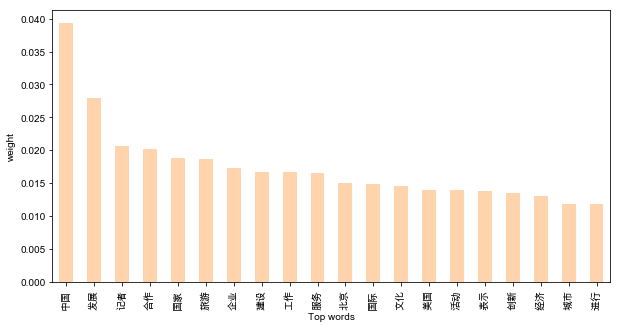

In [88]:
#dict = {k:float(v) for k, v in dict.iteritems()}
s = pd.Series(d_top, name='Top words')
#s.index.name = 'Top words'
s.reset_index()

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10,5))
plt.ylabel("weight")
plt.xlabel("Top words")
s.plot.bar(colormap='icefire_r')

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [56]:
def cut(string):
    #return list(jieba.cut(string, cut_all=False))
    return " ".join(jieba.cut(string, cut_all=False))
df_cn['content_d'] = df_cn['content'].apply(cut)

In [57]:
df_cn.head()

,Unnamed: 0,column_1,column_2,content,publishtime,source,title,url,content_d
0,0,2018,2018达沃斯论坛,满格，请注意，大连达沃斯的“强信号”来了！ 李克强总理出席2017夏季达沃斯论坛两场“重...,2018-09-19 17:50,"作者： 李昊,来源：人民网",李克强达沃斯论坛上向外商释放了哪些“强信号”？,https://cn.chinadaily.com.cn/a/201809/19/WS5be...,满格 ， 请 注意 ， 大连 达沃斯 的 “ 强 信号 ” 来 了 ！ 李克强 ...
1,1,2018,影响力峰会,中国日报网1月5日电 1月5日，中国日报网与网易传媒共同举办的2019影响力峰会在北京国贸大...,2019-01-05 10:05,来源：中国日报网,《灰犀牛》作者米歇尔·渥克：第四次工业革命是没有国界的,https://cn.chinadaily.com.cn/a/201901/05/WS5c3...,中国日报 网 1 月 5 日电 1 月 5 日 ， 中国日报 网 与 网易 传媒 共同 ...
2,2,2018,影响力峰会,中国日报网1月5日电 由中国日报和网易新闻联合主办的2019影响力峰会1月5日在北京举行，本...,2019-01-05 09:55,来源：中国日报网,江小涓：大国能更好地支撑生产型服务业 中国极具优势,https://cn.chinadaily.com.cn/a/201901/05/WS5c3...,中国日报 网 1 月 5 日电 由 中国日报 和 网易 新闻 联合 主办 的 2019 ...
3,3,2018全国两会,flash,全国人大代表在“代表通道”接受采访。人民网记者 翁奇羽摄 3月13日上午9时，十三届全国人大...,2018-03-13 09:55,来源：人民网-图片频道,第四场“代表通道”开启：全国人大代表接受采访,https://cn.chinadaily.com.cn/a/201803/13/WS5be...,全国 人大代表 在 “ 代表 通道 ” 接受 采访 。 人民网 记者 翁奇羽 摄 3...
4,4,2018全国两会,焦点新闻,3月17日，十三届全国人大一次会议在北京人民大会堂举行第五次全体会议。 新华社记者 姚大伟 摄,2018-03-17 10:05,来源：新华网,十三届全国人大一次会议举行第五次全体会议,https://cn.chinadaily.com.cn/a/201803/17/WS5be...,3 月 17 日 ， 十三届 全国人大 一次 会议 在 北京人民大会堂 举行 第五次 全体会...


In [58]:
graph = df_cn['column_1'].value_counts()
graph

中国在线                   3461
中文首页                   2826
中文原创                   2543
中文资讯                   1268
时政频道                   1160
旅游频道                    987
当日要闻                    689
公益频道                    398
老外谈                     358
财经频道                    356
新疆                      143
江西                      124
云南                       92
图片频道                     84
湖南                       77
外眼看中国                    75
文化频道                     71
辽宁                       71
黑龙江                      71
四川                       64
陕西                       61
生活频道                     58
中国日报精选                   57
吉林                       52
广东                       49
山东                       49
湖北                       42
江苏                       41
企业频道                     38
上海                       37
                       ... 
浙江                       27
2019                     26
山西                       22
VISION CHINA 新时代大讲堂      18
天津                  

In [59]:
df_cn['column_1'].unique()

array(['2018', '2018全国两会', '2019', '2019全国两会', '2019酒店大赏',
       'VISION CHINA 新时代大讲堂', '上海', '中国国际进口博览会', '中国在线', '中国日报精选',
       '中国那些事儿', '中国频道', '中报精选', '中文原创', '中文原创新闻', '中文聚焦', '中文资讯', '中文首页',
       '二十国集团领导人大阪峰会', '云南', '企业频道', '公益频道', '创新中国', '北京', '吉林', '四川',
       '图片频道', '壮丽70年·奋斗新时代', '外眼看中国', '天津', '山东', '山西', '广东', '广西',
       '当日要闻', '微阅读', '房产频道', '文化频道', '新疆', '旅游频道', '时政要闻', '时政频道',
       '权威发布', '江苏', '江西', '汽车频道', '河北', '河南', '浙江', '海南', '深圳', '湖北',
       '湖南', '生活滚动', '生活频道', '福建', '科技频道', '老外谈', '西藏', '评论', '财经频道',
       '贵州', '辽宁', '重庆', '金融频道', '陕西', '黑龙江'], dtype=object)

In [135]:
#df_test = df_cn[df_cn['column_1'] == '时政频道' | df_cn['column_1'] == '旅游频道']
df_test = df_cn[(df_cn['column_1'] == '时政频道')|(df_cn['column_1'] == '旅游频道')|(df_cn['column_1'] == '财经频道')| (df_cn['column_1'] == '公益频道')]
df_test.head()

,Unnamed: 0,column_1,column_2,content,publishtime,source,title,url,content_d
10438,10517,公益频道,公益滚动,4月13日，“童画食安·全国儿童食品安全守护行动”主题画展在中国儿童中心举行，本次画展由中国...,2019-04-15 15:09,来源：新华网,“童画食安·全国儿童食品安全守护行动”主题画展在京举行,https://cn.chinadaily.com.cn/a/201904/15/WS5cb...,4 月 13 日 ， “ 童画 食安 · 全国 儿童 食品安全 守护 行动 ” 主题 画展 ...
10439,10518,公益频道,公益滚动,中国日报北京4月13日电 2019年4月13日，“学前学会普通话”行动捐赠仪式在京举行，中植...,2019-04-16 09:39,"作者： 严玉洁,来源：中国日报",爱心企业中植集团捐资支持“学前学会普通话”行动,https://cn.chinadaily.com.cn/a/201904/16/WS5cb...,中国日报 北京 4 月 13 日电 2019 年 4 月 13 日 ， “ 学前 学会 ...
10440,10519,公益频道,公益滚动,"为了推进贫困地区教育信息化建设,促进教育均衡化、优质化发展，近日，由中国教育技术协会学术委员...",2019-04-17 10:09,"作者： 安 迪,来源：慈善公益报",让贫困地区孩子享优质教育资源,https://cn.chinadaily.com.cn/a/201904/17/WS5cb...,"为了 推进 贫困地区 教育 信息化 建设 , 促进 教育 均衡化 、 优质化 发展 ， 近日..."
10441,10520,公益频道,公益滚动,【人物】“乡村主播”李宏波 【故事】菜地沟村位于山西省晋中市和顺县李阳镇，地处太行山深处，此...,2019-04-17 10:09,来源：人民网－人民日报,“乡村主播”李宏波:扶志有志易成事,https://cn.chinadaily.com.cn/a/201904/17/WS5cb...,【 人物 】 “ 乡村 主播 ” 李宏波 【 故事 】 菜 地沟 村 位于 山西省 晋中...
10442,10521,公益频道,公益滚动,记者从16日召开的国务院政策例行吹风会上获悉，2018年，我国医疗救助惠及1.2亿人次，支出...,2019-04-17 10:36,"作者： 张扬、杨志刚、张泉、王秉阳,来源：新华网",[视频]2018年我国医疗救助惠及1.2亿人次,https://cn.chinadaily.com.cn/a/201904/17/WS5cb...,记者 从 16 日 召开 的 国务院 政策 例行 吹风会 上 获悉 ， 2018 年 ， 我...


In [136]:
# x is feature data
X = df_test['content_d']
# y  is label
y = df_test['column_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 7)

In [137]:
X_train.shape

(2030,)

In [138]:
X_test.shape

(871,)

In [139]:
text_clf_RF = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),])


In [140]:
text_clf_RF.fit(X_train, y_train)  

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [141]:
predictions = text_clf_RF.predict(X_test)

In [142]:
print(confusion_matrix(y_test,predictions))

[[ 66  26  12   1]
 [ 11 257  40   2]
 [ 13  51 282   2]
 [  7  33  21  47]]


In [143]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        公益频道       0.68      0.63      0.65       105
        旅游频道       0.70      0.83      0.76       310
        时政频道       0.79      0.81      0.80       348
        财经频道       0.90      0.44      0.59       108

   micro avg       0.75      0.75      0.75       871
   macro avg       0.77      0.68      0.70       871
weighted avg       0.76      0.75      0.74       871



In [144]:
print(accuracy_score(y_test,predictions))

0.748564867967853


In [145]:
text_clf_LR = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),])
text_clf_LR.fit(X_train, y_train)  
predictions = text_clf_LR.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [146]:
print(confusion_matrix(y_test,predictions))

[[ 76  12  17   0]
 [  0 281  25   4]
 [  0  25 317   6]
 [  6  21  26  55]]


In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        公益频道       0.93      0.72      0.81       105
        旅游频道       0.83      0.91      0.87       310
        时政频道       0.82      0.91      0.86       348
        财经频道       0.85      0.51      0.64       108

   micro avg       0.84      0.84      0.84       871
   macro avg       0.86      0.76      0.79       871
weighted avg       0.84      0.84      0.83       871



In [148]:
print(accuracy_score(y_test,predictions))

0.8369690011481056


In [149]:
text_clf_NB = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Feed the training data through the pipeline
text_clf_NB.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [150]:
predictions = text_clf_NB.predict(X_test)

In [151]:
print(confusion_matrix(y_test,predictions))

[[ 27  34  44   0]
 [  0 291  19   0]
 [  0  44 304   0]
 [  2  38  53  15]]


In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        公益频道       0.93      0.26      0.40       105
        旅游频道       0.71      0.94      0.81       310
        时政频道       0.72      0.87      0.79       348
        财经频道       1.00      0.14      0.24       108

   micro avg       0.73      0.73      0.73       871
   macro avg       0.84      0.55      0.56       871
weighted avg       0.78      0.73      0.68       871



In [153]:
print(accuracy_score(y_test,predictions))

0.7313432835820896
